<a href="https://colab.research.google.com/github/Evans-Junior/-bits/blob/main/evans_favour.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Our importations
import pandas as pd,numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


**Working on my 2021 Dataset**

*Data Preprocessing*


In [ ]:
# Training Dataset
df=pd.read_csv("/content/drive/My Drive/AI/players_21.csv")

df.head()
df.shape


(18944, 110)

*Find all the relevant data to the overall*

In [ ]:
# Calculate the correlation matrix for overall
correlation_matrix = df.corr()['overall']

# Filter the correlations that meet your criteria (greater than 0.55 or less than -0.55) when compared to the overall column
# Reason for this decision
# # We decided to use a correlation range between  -0.55 and 0.55 because  indicates a moderate linear relationship.
# # This means that as one variable increases or decreases, the other tends to move in the same general direction, but not necessarily in a perfectly linear way. We believe that a correlation of -0.55 to 0.55 may not be extremely strong.
# # It still provides valuable information for predictive modeling. It suggests that there is some degree of association between the variables, and this association can be useful for making predictions. Also to prevent multicollinearity.
# # Moderate correlations are less likely to cause multicollinearity issues while still offering predictive power.

high_correlations = correlation_matrix[(correlation_matrix > 0.55) | (correlation_matrix < -0.55)]
high_correlations

<ipython-input-5-45c46e38d190>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()['overall']


overall                1.000000
potential              0.636366
value_eur              0.558493
wage_eur               0.592452
release_clause_eur     0.626277
passing                0.711521
dribbling              0.641097
movement_reactions     0.867234
power_shot_power       0.558372
mentality_composure    0.705252
Name: overall, dtype: float64

*Dropping irrelevant data*

In [ ]:
# Creating the important dataset neeted for the prediciton
relevantDataSet=df[high_correlations.index]

# 'release_clause_eur': is the money a club interest in a player must pay before they can buy a play from his current club. We decided to remove this column because we though this does not directly affect the players overall performance in his career
relevantDataSet.drop(['release_clause_eur'], axis=1, inplace=True)
relevantDataSet.isnull().sum()


<ipython-input-6-882e1827b0d0>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  relevantDataSet.drop(['release_clause_eur'], axis=1, inplace=True)


overall                   0
potential                 0
value_eur               237
wage_eur                225
passing                2083
dribbling              2083
movement_reactions        0
power_shot_power          0
mentality_composure       0
dtype: int64

*Our Graphical representations*

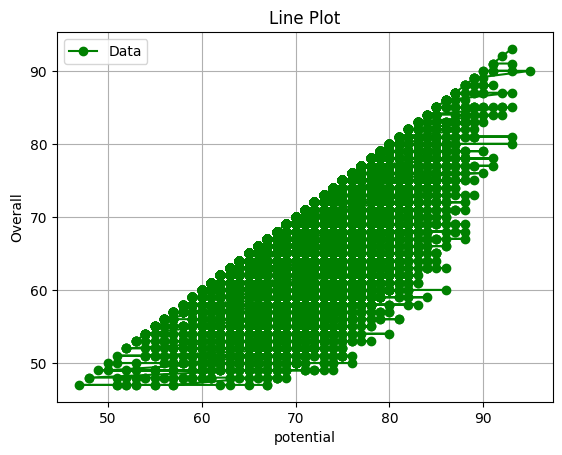

In [ ]:
# Plotting (to be modified)

x = relevantDataSet['potential']
y = relevantDataSet['overall']
#LINEPLOT
import matplotlib.pyplot as plt

x = relevantDataSet['potential']
y = relevantDataSet['overall']

plt.plot(x, y, marker='o', linestyle='-', color='g', label='Data')

plt.xlabel('potential')
plt.ylabel('Overall')
plt.title('Line Plot')
plt.legend()
plt.grid(True)

plt.show()

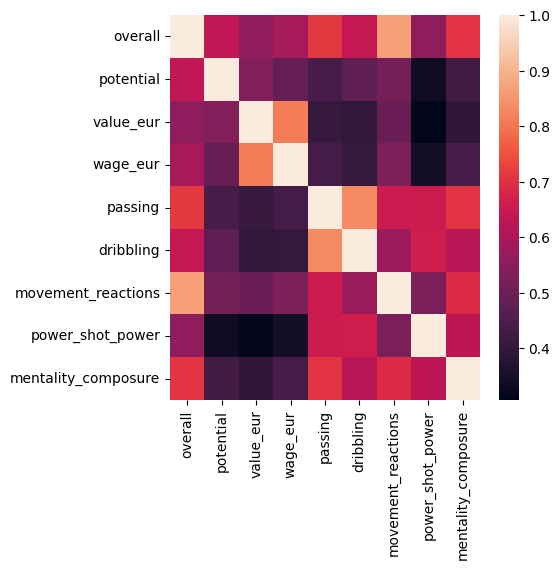

In [ ]:
#HEATMAP
cormat = relevantDataSet.corr()
round(cormat,2)
plt.figure(figsize=(5,5))
sns.heatmap(cormat);


# Forwards: Forwards are most likely to have the skill moves "dribbling" and "attacking finishing". This makes sense, as forwards are responsible for scoring goals, and these skill moves help them to get past defenders and create scoring opportunities.
# Midfielders: Midfielders are most likely to have the skill moves "dribbling" and "passing". This makes sense, as midfielders are responsible for connecting the defense and attack, and these skill moves help them to move the ball past defenders and create scoring opportunities for their teammates.
# Defenders: Defenders are most likely to have the skill moves "defending standing tackle" and "defending sliding tackle". This makes sense, as defenders are responsible for preventing the opposition from scoring goals, and these skill moves help them to win the ball back from attackers.
# It is also worth noting that the skill move "dribbling" is the most common skill move among players in all positions. This suggests that dribbling is a fundamental skill for all soccer players to have, regardless of their position.

# Overall, the heatmap provides a useful overview of the distribution of skill moves among soccer players in different positions. It is used by coaches and players to identify areas where they need to improve their skill sets.

*Removing all Nans in the relevant dataset chosen*

In [ ]:
# checking if there exist any missing values
relevantDataSet.isnull().sum()


overall                   0
potential                 0
value_eur               237
wage_eur                225
passing                2083
dribbling              2083
movement_reactions        0
power_shot_power          0
mentality_composure       0
dtype: int64

In [ ]:
# get dataset columns with null
uncleanData=relevantDataSet.loc[:,"value_eur":"dribbling"]
uncleanData

,value_eur,wage_eur,passing,dribbling
0,103500000.0,560000.0,91.0,95.0
1,63000000.0,220000.0,81.0,89.0
2,111000000.0,240000.0,78.0,85.0
3,132000000.0,270000.0,86.0,94.0
4,129000000.0,370000.0,93.0,88.0
...,...,...,...,...
18939,70000.0,1000.0,26.0,27.0
18940,70000.0,1000.0,49.0,47.0
18941,45000.0,2000.0,49.0,46.0
18942,130000.0,500.0,40.0,53.0


In [ ]:
# Using SimpleImpute to fill all Nan in my DataSet with the dean of each column
imp=SimpleImputer(strategy='median')
a=imp.fit_transform(uncleanData)
sub_df=pd.DataFrame(a, columns=uncleanData.columns)

# Checking if it worked
sub_df.isnull().sum()


value_eur    0
wage_eur     0
passing      0
dribbling    0
dtype: int64

In [ ]:
# Removing the unclean columns from our original relevant dataset
relevantDataSet.drop(uncleanData,axis=1,inplace=True)
relevantDataSet.shape

<ipython-input-13-543ef448255a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  relevantDataSet.drop(uncleanData,axis=1,inplace=True)


(18944, 5)

In [ ]:
# Combining my revised unclean dataset to my relevant dataset
relevantDataSet_update=pd.concat([relevantDataSet,sub_df],axis=1)
relevantDataSet_update.isnull().sum()
relevantDataSet_update

relevantDataSet_update.dtypes

overall                  int64
potential                int64
movement_reactions       int64
power_shot_power         int64
mentality_composure      int64
value_eur              float64
wage_eur               float64
passing                float64
dribbling              float64
dtype: object

In [ ]:
# Scaling the columns to make better to prediciton
sc=StandardScaler()

# Finding scaler of relevantDataSet values without overall
scaled=sc.fit_transform(relevantDataSet_update.loc[:,"potential":])
scaled

array([[ 3.58656347,  3.55443758,  2.11902561, ..., 27.84507796,
         3.48251869,  3.41067019],
       [ 3.42289263,  3.66417438,  2.7191631 , ..., 10.66064386,
         2.45114847,  2.77857172],
       [ 3.25922178,  3.44470079,  2.34407717, ..., 11.67149293,
         2.1417374 ,  2.35717274],
       ...,
       [-3.94229527, -1.93240217, -0.65661025, ..., -0.35761093,
        -0.84923625, -1.75146732],
       [-0.66887843, -0.94477101, -0.58159306, ..., -0.43342461,
        -1.77746946, -1.0140191 ],
       [-0.66887843, -1.1642446 , -0.73162744, ..., -0.43342461,
        -0.95237328, -1.43541808]])

In [ ]:
# create a new dataFrame of my scaled dataset

sub_set_data=pd.DataFrame(scaled,columns=relevantDataSet_update.loc[:,"potential":].columns)
sub_set_data

,potential,movement_reactions,power_shot_power,mentality_composure,value_eur,wage_eur,passing,dribbling
0,3.586563,3.554438,2.119026,3.137573,13.071234,27.845078,3.482519,3.410670
1,3.422893,3.664174,2.719163,3.055051,7.810099,10.660644,2.451148,2.778572
2,3.259222,3.444701,2.344077,2.477402,14.045519,11.671493,2.141737,2.357173
3,3.259222,3.225227,1.668922,2.890009,16.773515,13.187767,2.966834,3.305320
4,3.259222,3.225227,2.494112,2.724966,16.383801,18.242012,3.688793,2.673222
...,...,...,...,...,...,...,...,...
18939,-3.123941,-1.493455,-1.706851,-1.483625,-0.364795,-0.408153,-3.221388,-3.753112
18940,-2.960270,-1.273981,-1.481799,-1.896232,-0.364795,-0.408153,-0.849236,-1.646118
18941,-3.942295,-1.932402,-0.656610,-1.896232,-0.368043,-0.357611,-0.849236,-1.751467
18942,-0.668878,-0.944771,-0.581593,-1.071018,-0.357001,-0.433425,-1.777469,-1.014019


*Defining xtrain as x and ytrain as y for further training*

In [ ]:
x=sub_set_data
y=relevantDataSet_update['overall']

**Creating my testing dataset for predicting**

In [ ]:
# Generating the xtest and ytest

# Using the fifa players data for 2022
df2=pd.read_csv("/content/drive/My Drive/AI/players_22.csv")

# Getting all the relevant data for my future prediction

# Taking columns from high_correlations genreated from the player data 2021
relevantDataSet2=df2[high_correlations.index]
relevantDataSet2

# Removing unrelated columns that do not directly affect players performance.
# release_clause_eur: Is the amount of money paid by another club whcich is interested in another clubs' player
relevantDataSet2.drop(['release_clause_eur'], axis=1, inplace=True)

# Getting all columns with Nans
relevantDataSet2.isnull().sum()
uncleanData2=relevantDataSet2.loc[:,"value_eur":"dribbling"]
uncleanData2

# Using the simpleImputer to replace all Nans in the columns with their corresponding Medians
imp2=SimpleImputer(strategy='median')
a2=imp2.fit_transform(uncleanData2)
sub_df2=pd.DataFrame(a2, columns=uncleanData2.columns)
sub_df2.isnull().sum()

# Dropping all the the Nans columns from the orginal column
relevantDataSet2.drop(uncleanData2,axis=1,inplace=True)
relevantDataSet2.shape

# Create a new dataset with better information for the model
relevantDataSet_update2=pd.concat([relevantDataSet2,sub_df2],axis=1)

# Cross checking if it was successful
relevantDataSet_update2.isnull().sum()


# Finding scaler of the new dataset we have without overall
scaled2=sc.fit_transform(relevantDataSet_update2.loc[:,"potential":])
scaled2
sub_set_data2=pd.DataFrame(scaled2,columns=relevantDataSet_update2.loc[:,"potential":].columns)
sub_set_data2

<ipython-input-30-7e4103716f9d>:4: DtypeWarning: Columns (25,108) have mixed types. Specify dtype option on import or set low_memory=False.
  df2=pd.read_csv("/content/drive/My Drive/AI/players_22.csv")
<ipython-input-30-7e4103716f9d>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  relevantDataSet2.drop(['release_clause_eur'], axis=1, inplace=True)
<ipython-input-30-7e4103716f9d>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  relevantDataSet2.drop(uncleanData2,axis=1,inplace=True)


,potential,movement_reactions,power_shot_power,mentality_composure,value_eur,wage_eur,passing,dribbling
0,3.601780,3.599846,2.139433,3.131025,9.889397,15.996581,3.539198,3.542596
1,3.437470,3.489252,2.442649,2.473077,15.350116,13.424792,2.275622,2.554865
2,3.273160,3.599846,2.745866,3.048782,5.547138,13.424792,2.380920,2.774360
3,3.273160,3.046874,1.684607,2.884295,16.600160,13.424792,3.012708,3.432848
4,3.273160,3.268063,2.518454,2.555321,16.139617,17.539654,3.749794,2.774360
...,...,...,...,...,...,...,...,...
19234,-3.134932,-0.934526,-0.892735,-1.721343,-0.364913,-0.411430,-1.199211,-1.615558
19235,-1.984762,-1.376903,-0.665323,-0.898908,-0.359649,-0.437148,-0.778020,-1.835054
19236,-2.642002,-1.708687,-0.589519,-1.803587,-0.360965,-0.437148,-1.304509,-1.505810
19237,-1.820452,-1.487498,-0.741127,-0.898908,-0.359649,-0.437148,-2.252191,-1.615558


*Defining our xtest and ytest for further prediction*

In [ ]:
xtest=sub_set_data2
ytest=relevantDataSet_update2['overall']

Necessary importations to help in training and predictions

In [ ]:
# Testing with just LinearRegression
from sklearn.ensemble import VotingRegressor,RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error


Instantaition of our regressors to be used

In [ ]:
random_forest = RandomForestRegressor()
svr = SVR()
xgb_model = XGBRegressor(base_score=0.5, booster='gblinear', n_estimators=100, learning_rate=0.1, random_state=42)
decision_tree = DecisionTreeRegressor(max_depth=10)

Structure of our model to be used in the VotingRegressor

In [ ]:
voting_regressor = VotingRegressor(estimators=[
    ('random_forest', random_forest),
    ('svr', svr),
    ('xgb_model', xgb_model),
    ('decision_tree',decision_tree)
])


Performing Fits, Predicitons and finding the Mean squared errors(MSE) and fine tunning my MSE for each regressors used

In [ ]:
for clf in ( random_forest,svr,xgb_model,decision_tree, voting_regressor):
 clf.fit(x, y)
 y_pred = clf.predict(xtest) #Predict
 mse = mean_squared_error(ytest, y_pred)  # Calculate MSE
 mae = mean_absolute_error(ytest, y_pred) # Calculate MAE
 print("Using the",clf.__class__.__name__,"\n Mean Squared Error (MAE):", mse)
 print(" Mean Absolute Error (MAE):", mae)
 print(" Prediction Accuracy:","{:.2f}%".format(100*r2_score(ytest, y_pred)))
 print(" ")



Using the RandomForestRegressor 
 Mean Squared Error (MAE): 1.2832689276989446
 Mean Absolute Error (MAE): 0.65324029315453
 Prediction Accuracy: 97.29%
 
Using the SVR 
 Mean Squared Error (MAE): 3.6409576228988856
 Mean Absolute Error (MAE): 1.3102675145294964
 Prediction Accuracy: 92.31%
 
Using the XGBRegressor 
 Mean Squared Error (MAE): 7.3917323507420205
 Mean Absolute Error (MAE): 2.1037890465345432
 Prediction Accuracy: 84.38%
 
Using the DecisionTreeRegressor 
 Mean Squared Error (MAE): 2.339632299382556
 Mean Absolute Error (MAE): 0.9052762411337768
 Prediction Accuracy: 95.06%
 
Using the VotingRegressor 
 Mean Squared Error (MAE): 2.212257611274632
 Mean Absolute Error (MAE): 1.0608399800150439
 Prediction Accuracy: 95.33%
 


Fine-tuned models

Cross Validation testing

In [ ]:
fine_tuned_random_forest = RandomForestRegressor(n_estimators=400, max_depth=100, max_features='auto', random_state=82)
fine_tuned_svr = SVR(kernel='rbf', C=10, epsilon=0.1)
fine_tuned_xgb_model = XGBRegressor(learning_rate=0.1, max_depth=10, n_estimators=200)
fine_tuned_decision_tree = DecisionTreeRegressor(max_depth=200, min_samples_leaf=8)



Create a Voting Regressor again

In [ ]:
voting_regressor = VotingRegressor(estimators=[
    ('random_forest', fine_tuned_random_forest),
    ('svr', fine_tuned_svr),
    ('xgb_model', fine_tuned_xgb_model),
    ('decision_tree', fine_tuned_decision_tree)
])

In [ ]:
for clf in ( fine_tuned_random_forest,fine_tuned_svr,fine_tuned_xgb_model,fine_tuned_decision_tree, voting_regressor):
 clf.fit(x, y)
 y_pred = clf.predict(xtest) #Predict
 mse = mean_squared_error(ytest, y_pred)  # Calculate MSE
 mae = mean_absolute_error(ytest, y_pred) # Calculate MAE
 print("Using the",clf.__class__.__name__,"\n Mean Squared Error (MAE):", mse)
 print(" Mean Absolute Error (MAE):", mae)
 print(" Prediction Accuracy:","{:.2f}%".format(100*r2_score(ytest, y_pred)))
 print(" ")

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


Using the RandomForestRegressor 
 Mean Squared Error (MAE): 1.2647307107308072
 Mean Absolute Error (MAE): 0.6476208482769374
 Prediction Accuracy: 97.33%
 
Using the SVR 
 Mean Squared Error (MAE): 2.38320985159118
 Mean Absolute Error (MAE): 1.0387333754386108
 Prediction Accuracy: 94.97%
 
Using the XGBRegressor 
 Mean Squared Error (MAE): 1.8000043549596485
 Mean Absolute Error (MAE): 0.8565509512008206
 Prediction Accuracy: 96.20%
 
Using the DecisionTreeRegressor 
 Mean Squared Error (MAE): 2.123256249067941
 Mean Absolute Error (MAE): 0.8223170288311409
 Prediction Accuracy: 95.51%
 


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


Using the VotingRegressor 
 Mean Squared Error (MAE): 1.4002436962998273
 Mean Absolute Error (MAE): 0.7419547926656018
 Prediction Accuracy: 97.04%
 


In [ ]:
def predict(potential,movement_reactions,power_shot_power,mentality_composure,value_eur,wage_eur,passing,dribbling):
  data=[potential,movement_reactions,power_shot_power,mentality_composure,value_eur,wage_eur,passing,dribbling]
  if all(not math.isnan(variable) for variable in data) & all(isinstance(variable, (int, float)) for variable in data):
    scaled_data=sc.fit_transform([data])
    return round(voting_regressor.predict(scaled_data),2)
  return 'Check your inputs, there is a mistake in there'

**Saving the trained model**

In [ ]:
import pickle

In [ ]:
model_filename = "sport_model.sav"
# Save the model to a file using pickle
with open(model_filename, 'wb') as model_file:
    pickle.dump(voting_regressor, model_file)

print(f"Model saved as {model_filename}")


Model saved as sport_model.sav


**For using the model**

In [ ]:
# Load the model from the file using pickle
with open(model_filename, 'rb') as model_file:
    loaded_model = pickle.load(model_file)

# Now you can use 'loaded_model' for predictions
predictions = loaded_model.predict(scaled_data)  # Use your data for predictions

print("Predicted values:", predictions)

NameError: ignored